## This is exp 5x7 for ibmq_5_yorktown. The initial circuit is 5x5 which is then traspiled to 5x7. Only H and CNOT gates are used.

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *

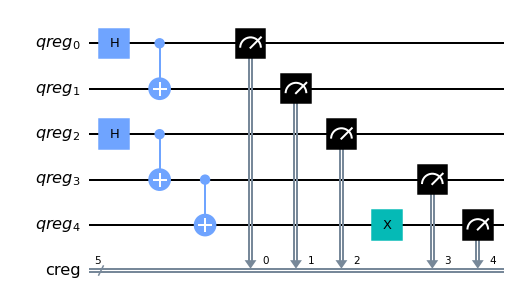

In [2]:
#define the number of qubits - width
width = 5

#define the quantum register
q =  QuantumRegister(width,"qreg")

# define a classical register
# it stores the measurement result of the quantum part
c = ClassicalRegister(width,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)

qc.h(0)
qc.h(2)

qc.cx(0,1)
qc.cx(2,3)
qc.cx(3,4)
qc.x(4)

# measure the first qubit, and store the result in the first classical bit
qc.measure(q,c)

# draw the circuit by using matplotlib
qc.draw(output='mpl') # re-run the cell if the figure is not displayed

In [3]:
qc.depth()

5

{'10000': 2488, '10011': 2467, '01100': 2494, '01111': 2551}



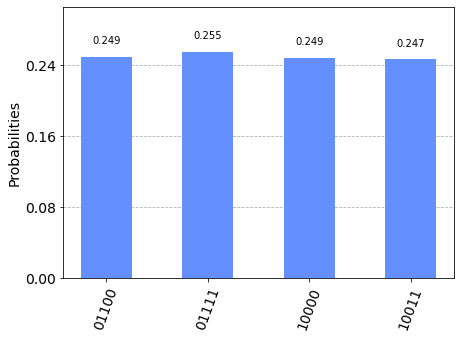

In [4]:
# execute the circuit 10000 times in the local simulator

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

# we can show the result by using histogram
print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [5]:
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

provider = IBMQ.get_provider("ibm-q")
#using this tool to monitor our position in queue
from qiskit.tools.monitor import job_monitor

#choose real device
backend = provider.get_backend('ibmq_5_yorktown')

In [6]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

### Run the circuit with optimization_level = 1

In [7]:
qc_transpiled = transpile(qc, backend, optimization_level=1)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 7


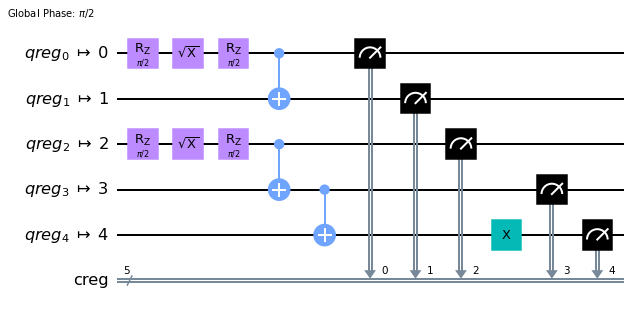

In [8]:
qc_transpiled.draw(output='mpl')

In [9]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job has successfully run


{'00000': 19, '00001': 3, '10000': 175, '10001': 34, '10010': 38, '10011': 181, '10100': 22, '10101': 5, '10110': 5, '10111': 16, '11000': 4, '11001': 1, '11010': 2, '11011': 6, '11100': 12, '11101': 4, '11110': 3, '11111': 4, '00010': 3, '00011': 19, '00100': 8, '00101': 3, '00110': 3, '00111': 15, '01000': 37, '01001': 6, '01010': 3, '01011': 23, '01100': 176, '01101': 33, '01110': 21, '01111': 140}


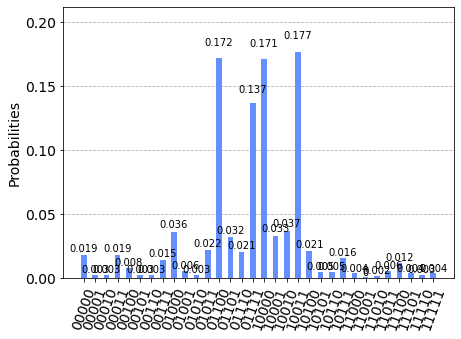

In [10]:
results = job.result()
answer = results.get_counts()
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

plot_histogram(answer)

### Run the circuit with optimization_level = 2

In [11]:
qc_transpiled = transpile(qc, backend, optimization_level=2)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 7


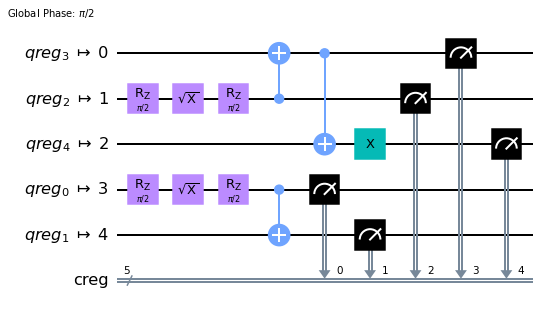

In [12]:
qc_transpiled.draw(output='mpl')

In [13]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job has successfully run


{'00000': 20, '00001': 3, '10000': 198, '10001': 48, '10010': 30, '10011': 137, '10100': 4, '10101': 5, '10110': 2, '10111': 16, '11000': 13, '11001': 3, '11010': 3, '11011': 8, '11100': 19, '11101': 2, '11110': 2, '11111': 10, '00010': 2, '00011': 13, '00100': 31, '00101': 2, '00110': 1, '00111': 17, '01000': 25, '01001': 11, '01010': 2, '01011': 19, '01100': 169, '01101': 37, '01110': 25, '01111': 147}


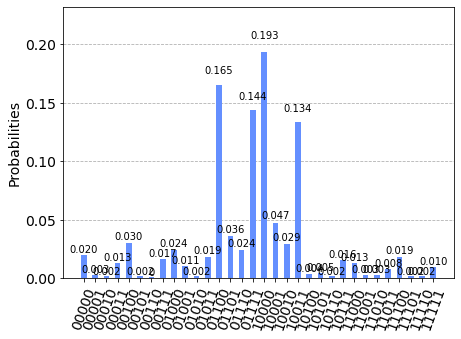

In [14]:
results = job.result()
answer = results.get_counts()
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

plot_histogram(answer)

### Run the circuit with optimization_level = 3

In [15]:
qc_transpiled = transpile(qc, backend, optimization_level=3)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 7


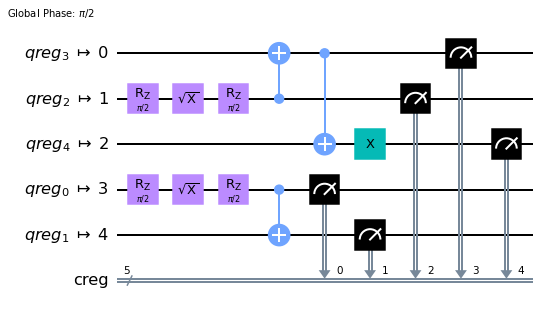

In [16]:
qc_transpiled.draw(output='mpl')

In [17]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job has successfully run


{'00000': 22, '00001': 6, '10000': 178, '10001': 42, '10010': 21, '10011': 155, '10100': 24, '10101': 7, '10110': 2, '10111': 18, '11000': 3, '11010': 1, '11011': 4, '11100': 6, '11101': 4, '11110': 2, '11111': 12, '00010': 1, '00011': 13, '00100': 18, '00101': 2, '00110': 3, '00111': 11, '01000': 37, '01001': 1, '01010': 2, '01011': 29, '01100': 196, '01101': 27, '01110': 32, '01111': 145}


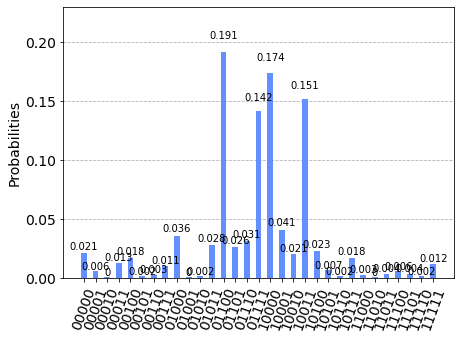

In [19]:
results = job.result()
answer = results.get_counts()
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

plot_histogram(answer)